In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('faithful.csv')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


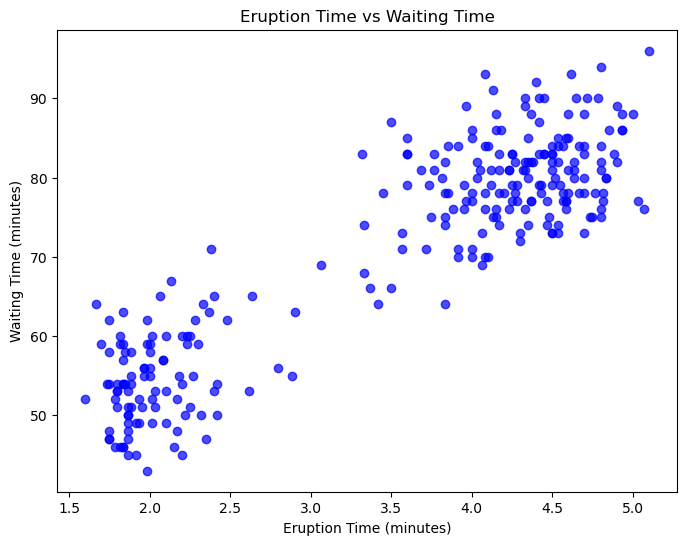

In [13]:
# Create a scatter plot of eruption time versus waiting time
plt.figure(figsize=(8, 6))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7,color = 'blue')
plt.title("Eruption Time vs Waiting Time")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.show()


#### Your source code for the k-means algorithm. You need to implement the algorithm from scratch. (45 points)

In [29]:

# Create kmean function
def kmeans(data, k, max_iters=100, tol=1e-4):
    """
    K-means clustering algorithm from scratch.

    Parameters:
    - data: pandas DataFrame of data points, shape (n_samples, n_features)
    - k: int, the number of clusters
    - max_iters: int, the maximum number of iterations (default is 100)
    - tol: float, tolerance to declare convergence (default is 1e-4)

    Returns:
    - centroids: numpy array of shape (k, n_features) representing the final cluster centers
    - labels: numpy array of shape (n_samples,) representing the cluster assignment of each point
    """
    
    # Convert the DataFrame to a numpy array for easier calculations
    data_np = data.values
    n_samples, n_features = data_np.shape
    
    # Step 1: Randomly initialize the centroids
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data_np[random_indices, :]
    
    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        labels = np.array([np.argmin([np.linalg.norm(point - centroid) for centroid in centroids]) for point in data_np])
        
        # Step 3: Calculate new centroids from the clusters
        new_centroids = np.array([data_np[labels == i].mean(axis=0) for i in range(k)])
        
        # Step 4: Check for convergence (if the centroids do not change significantly)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        centroids = new_centroids
    
    return centroids, labels



In [45]:
# Set the number of clusters
k = 2 
centroids, labels = kmeans(df,k)

In [47]:
centroids

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

In [49]:
labels

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

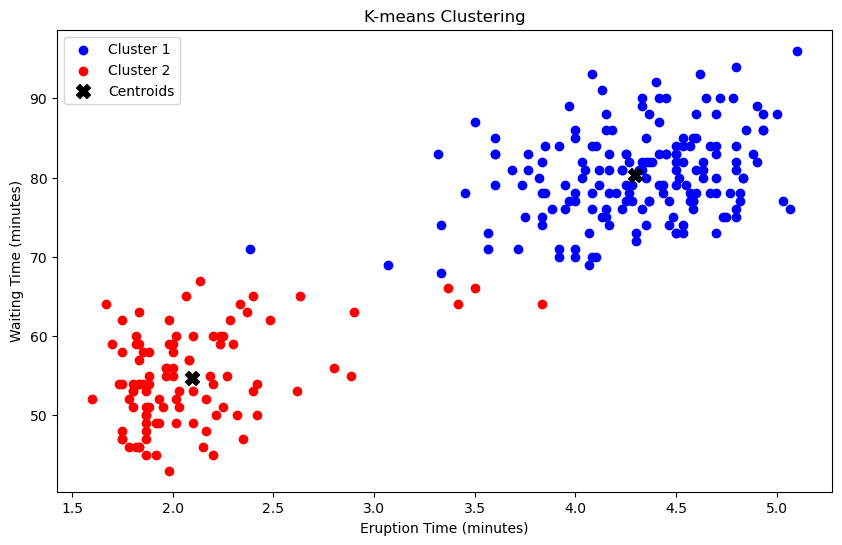

In [62]:
# Define colors for each cluster
colors = ['blue', 'red']  
# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster with custom colors
for i in range(k):
    cluster_points = df.values[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')

# Add plot details
plt.title('K-means Clustering')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.show()

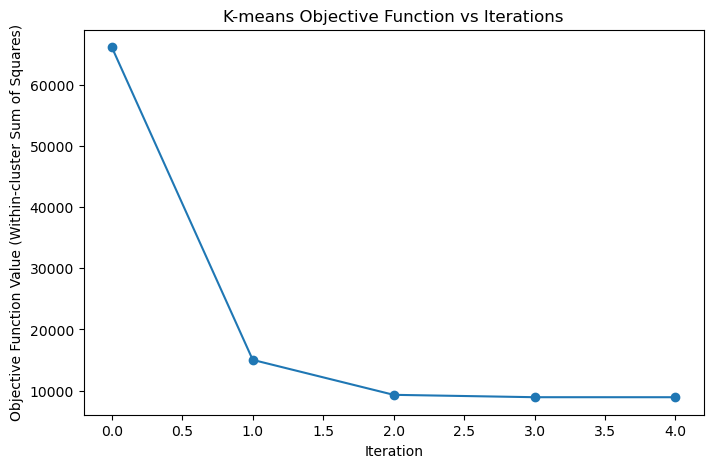

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans_with_objective(data, k, max_iters=100, tol=1e-4):
    """
    K-means clustering algorithm with objective function tracking.

    Parameters:
    - data: pandas DataFrame of data points, shape (n_samples, n_features)
    - k: int, the number of clusters
    - max_iters: int, the maximum number of iterations (default is 100)
    - tol: float, tolerance to declare convergence (default is 1e-4)

    Returns:
    - centroids: numpy array of shape (k, n_features) representing the final cluster centers
    - labels: numpy array of shape (n_samples,) representing the cluster assignment of each point
    - objectives: list of objective function values at each iteration
    """
    
    data_np = df.values
    n_samples, n_features = data_np.shape
    
    # Step 1: Randomly initialize the centroids
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data_np[random_indices, :]
    
    objectives = []  # To store the objective function values at each iteration

    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        labels = np.array([np.argmin([np.linalg.norm(point - centroid) for centroid in centroids]) for point in data_np])
        
        # Calculate the objective function (within-cluster sum of squares)
        objective = np.sum([np.linalg.norm(data_np[i] - centroids[labels[i]]) ** 2 for i in range(n_samples)])
        objectives.append(objective)
        
        # Step 3: Calculate new centroids from the clusters
        new_centroids = np.array([data_np[labels == i].mean(axis=0) for i in range(k)])
        
        # Step 4: Check for convergence (if the centroids do not change significantly)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        centroids = new_centroids
    
    return centroids, labels, objectives

centroids, labels, objectives = kmeans_with_objective(df, k)

# Plotting the objective function vs iterations
plt.figure(figsize=(8, 5))
plt.plot(objectives, marker='o')
plt.title('K-means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Within-cluster Sum of Squares)')

plt.show()
